In [306]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [307]:
import pandas as pd
import numpy as np


In [308]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


# single model 160 trials

In [309]:
inputfile = open('logfile')

In [310]:
df_alltrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [311]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [312]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_alltrials = df_alltrials.append(newdict,ignore_index=True)


In [313]:
df_alltrials

,subj,acc,script,k
0,2,0.53750,hierarchical_all_subjects.py,1
1,4,0.47500,hierarchical_all_subjects.py,1
2,10,0.53125,hierarchical_all_subjects.py,1
3,41,0.63750,hierarchical_all_subjects.py,1
4,43,0.59375,hierarchical_all_subjects.py,1
...,...,...,...,...
250,51,0.70625,hierarchical_all_subjects.py,15
251,52,0.92500,hierarchical_all_subjects.py,15
252,53,0.88750,hierarchical_all_subjects.py,15
253,54,0.98125,hierarchical_all_subjects.py,15


In [314]:
subjects_alltrials = df_alltrials['subj']
assert len(subjects_alltrials)/df_alltrials['k'].max() == len(df_alltrials['subj'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

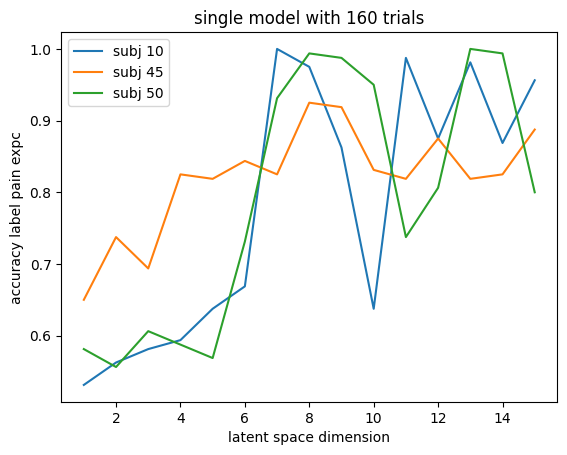

In [315]:
for i in list(['10','45','50']):
    y = df_alltrials[df_alltrials['subj']==i]['acc']
    x = df_alltrials[df_alltrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 10','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 160 trials')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

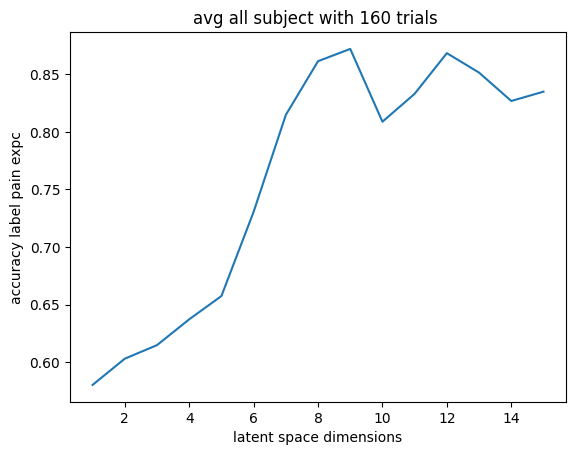

In [316]:
list_y=[]
list_x=[]
for i in list(df_alltrials['k'].unique()):
    list_y.append(df_alltrials[df_alltrials['k']==i]['acc'].mean())
    list_x.append(df_alltrials[df_alltrials['k']==i]['k'].unique())
plt.plot(list_x,list_y)
plt.title('avg all subject with 160 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# single model 112 trials

In [317]:
inputfile = open('logfile')

In [318]:
df_fewtrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [319]:
#for i in range(1471): inputfile.readline() # skip first 1470 lines

In [ ]:
for i in range(3000):
    line = inputfile.readline()
    if 'hierarchical_all_subjects_less_trials.py' in line:
        if 'Subj num:' in line:
            strline = str(line)
            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])
            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])
            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_fewtrials = df_fewtrials.append(newdict,ignore_index=True)


In [321]:
df_fewtrials

,subj,acc,script,k
0,2,0.517857,hierarchical_all_subjects_less_trials.py,1
1,4,0.455357,hierarchical_all_subjects_less_trials.py,1
2,10,0.598214,hierarchical_all_subjects_less_trials.py,1
3,41,0.651786,hierarchical_all_subjects_less_trials.py,1
4,43,0.589286,hierarchical_all_subjects_less_trials.py,1
...,...,...,...,...
250,51,0.714286,hierarchical_all_subjects_less_trials.py,15
251,52,0.714286,hierarchical_all_subjects_less_trials.py,15
252,53,0.803571,hierarchical_all_subjects_less_trials.py,15
253,54,0.794643,hierarchical_all_subjects_less_trials.py,15


In [322]:
subjects_fewtrials = df_fewtrials['subj']
assert len(subjects_fewtrials)/df_fewtrials['k'].max() == len(df_fewtrials['subj'].unique())

In [323]:
list_y_few=[]
list_x_few=[]
for i in list(df_fewtrials['k'].unique()):
    list_y_few.append(df_fewtrials[df_fewtrials['k']==i]['acc'].mean())
    list_x_few.append(df_fewtrials[df_fewtrials['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

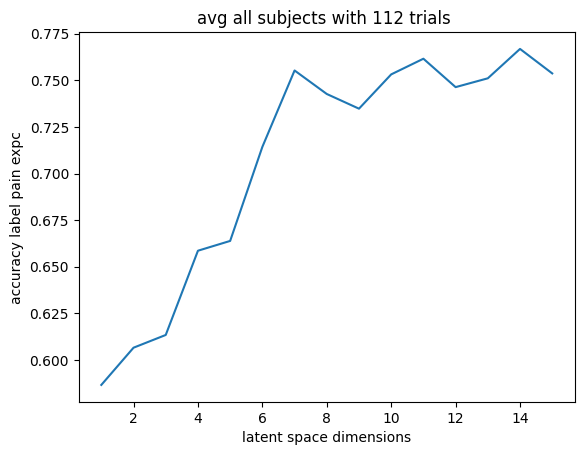

In [324]:
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

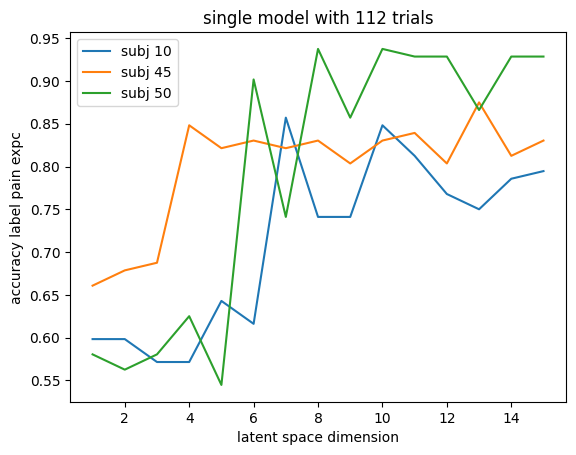

In [325]:
for i in list(['10','45','50']):
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']
    assert len(x)==len(y)
    plt.plot(x,y)
    plt.legend(['subj 10','subj 45','subj 50'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')
    plt.title('single model with 112 trials')

plt.show

# confronto 112 160 trials

<function matplotlib.pyplot.show(close=None, block=None)>

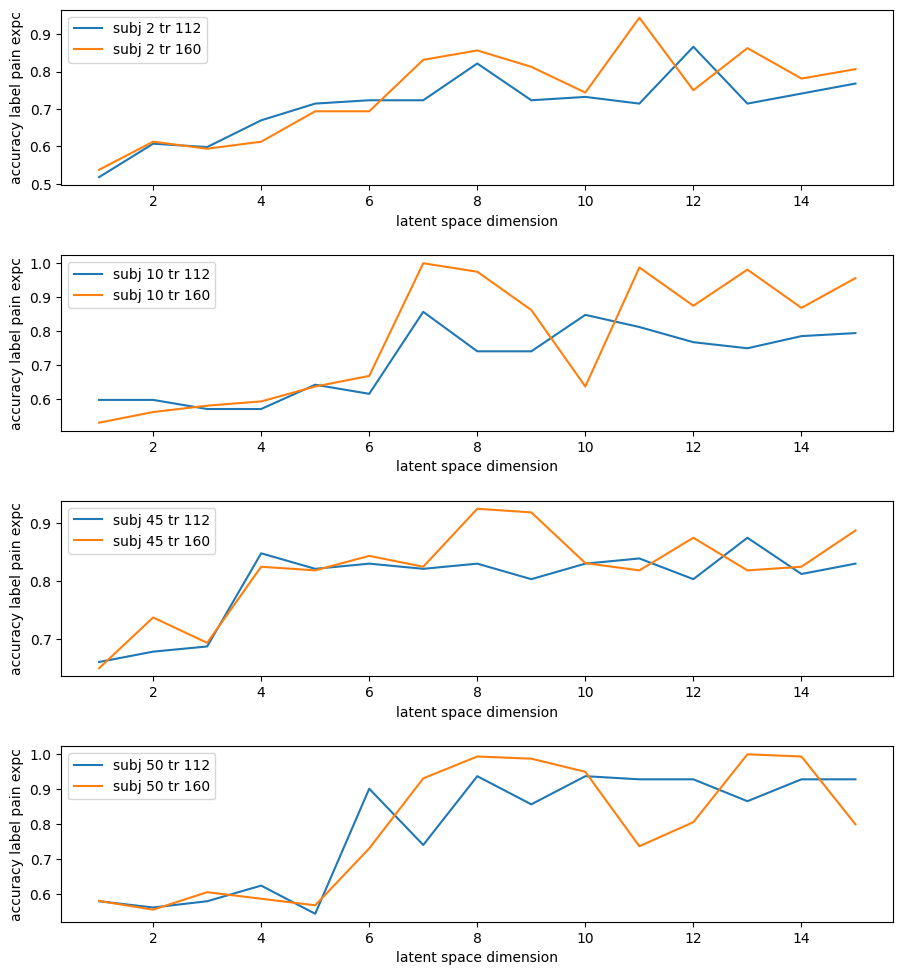

In [326]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_long = df_alltrials[df_alltrials['subj']==i]['acc']
    x_long = df_alltrials[df_alltrials['subj']==i]['k']
    y = df_fewtrials[df_fewtrials['subj']==i]['acc']
    x = df_fewtrials[df_fewtrials['subj']==i]['k']

    assert len(x)==len(y)
    assert len(x_long)==len(y_long)

    plt.subplot(4, 1, count)
    plt.plot(x,y)

    plt.plot(x_long,y_long)
    plt.legend(['subj '+i+' tr 112','subj '+i+' tr 160'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy label pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=2,wspace=0.4,hspace=0.4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

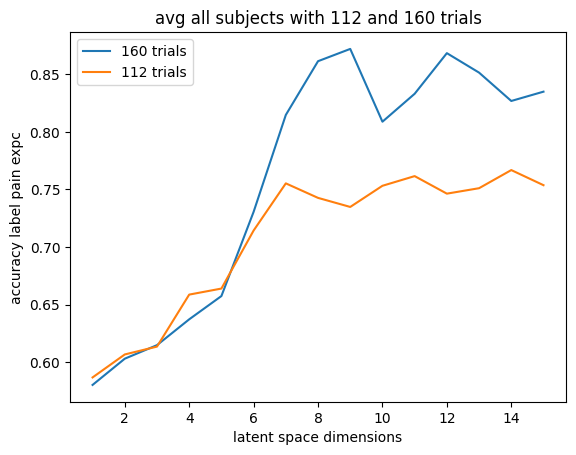

In [327]:
plt.plot(list_x,list_y)
plt.plot(list_x_few,list_y_few)
plt.title('avg all subjects with 112 and 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.legend(['160 trials','112 trials'])
plt.show

# EDA 112

In [328]:
inputfile = open('logfile_eda')

In [329]:
df_eda = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [330]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [331]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda = df_eda.append(newdict,ignore_index=True)


In [332]:
df_eda

,subj,pear,conc,script,k
0,2,0.7911,0.4969,hierarchical_all_subjects_less_trials_eda.py,1
1,4,0.8181,0.5430,hierarchical_all_subjects_less_trials_eda.py,1
2,10,0.7861,0.0919,hierarchical_all_subjects_less_trials_eda.py,1
3,41,0.8280,0.5424,hierarchical_all_subjects_less_trials_eda.py,1
4,43,0.7729,0.3884,hierarchical_all_subjects_less_trials_eda.py,1
...,...,...,...,...,...
250,51,0.8371,0.5724,hierarchical_all_subjects_less_trials_eda.py,15
251,52,0.8327,0.4762,hierarchical_all_subjects_less_trials_eda.py,15
252,53,0.7750,0.4154,hierarchical_all_subjects_less_trials_eda.py,15
253,54,0.9371,0.8425,hierarchical_all_subjects_less_trials_eda.py,15


In [333]:
subjects_eda = df_eda['subj']
assert len(subjects_eda)/df_eda['k'].max() == len(df_eda['subj'].unique())

In [334]:
list_y_conc_eda=[]
list_y_pear_eda = []
list_x_eda=[]
for i in list(df_eda['k'].unique()):
    list_y_pear_eda.append(df_eda[df_eda['k']==i]['pear'].mean())
    list_y_conc_eda.append(df_eda[df_eda['k']==i]['conc'].mean())
    list_x_eda.append(df_eda[df_eda['k']==i]['k'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

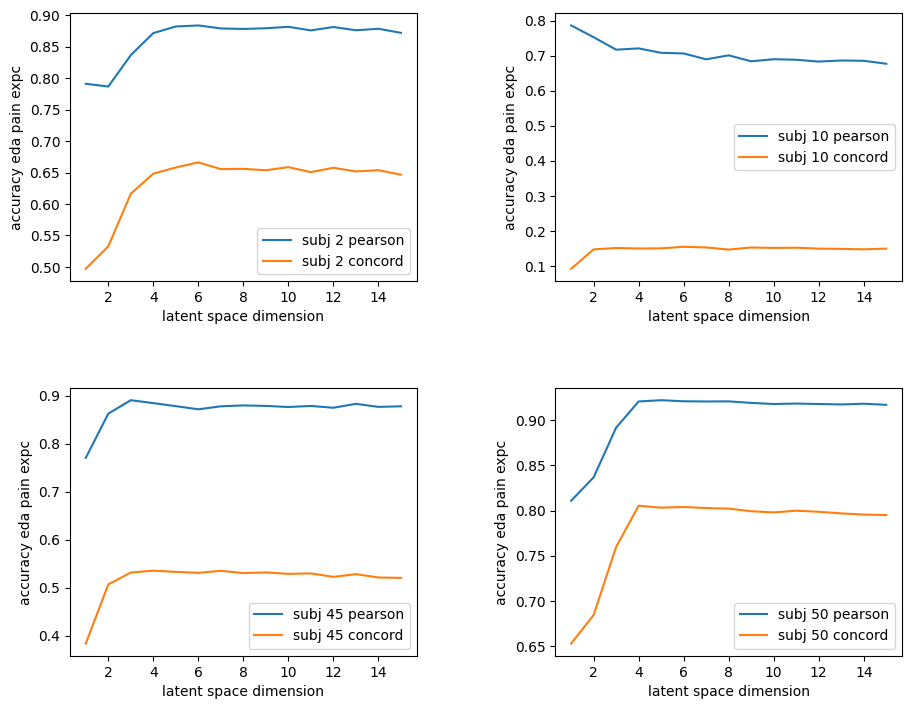

In [335]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_p = df_eda[df_eda['subj']==i]['pear']
    y_c = df_eda[df_eda['subj']==i]['conc']

    x = df_eda[df_eda['subj']==i]['k']
    assert len(x)==len(y)

    plt.subplot(4, 2, count)
    plt.plot(x,y_p)
    plt.plot(x,y_c)
    plt.legend(['subj '+i+' pearson','subj '+i+' concord'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

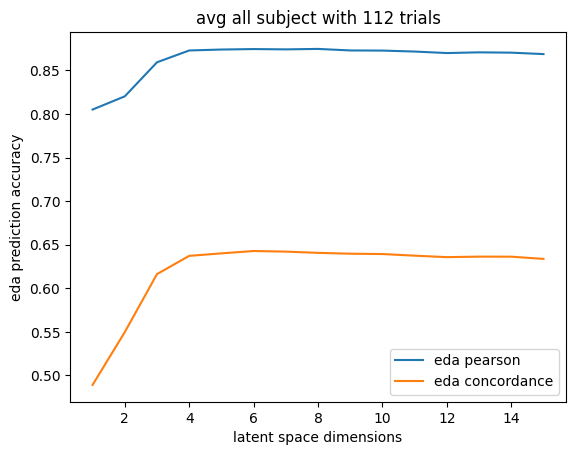

In [336]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson','eda concordance'])
plt.show

# eda 160

In [337]:
inputfile = open('logfile_eda_160_trials')

In [338]:
df_eda_long = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [339]:
#for i in range(47): inputfile.readline() # skip first 1470 lines

In [340]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            #print(strline)
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda_long = df_eda_long.append(newdict,ignore_index=True)


In [341]:
df_eda_long

,subj,pear,conc,script,k
0,2,0.8113,0.4988,hierarchical_all_subjects_eda.py,1
1,4,0.8446,0.5852,hierarchical_all_subjects_eda.py,1
2,10,0.7805,0.0858,hierarchical_all_subjects_eda.py,1
3,41,0.8494,0.4919,hierarchical_all_subjects_eda.py,1
4,43,0.7862,0.3218,hierarchical_all_subjects_eda.py,1
...,...,...,...,...,...
148,2,0.8950,0.6677,hierarchical_all_subjects_eda.py,9
149,4,0.9382,0.8085,hierarchical_all_subjects_eda.py,9
150,10,0.7148,0.1786,hierarchical_all_subjects_eda.py,9
151,41,0.8864,0.6296,hierarchical_all_subjects_eda.py,9


In [342]:
subjects_eda_l = df_eda_long['subj']
assert len(subjects_eda_l)/df_eda_long['k'].max() == len(df_eda_long['subj'].unique())

In [343]:
list_y_conc_eda_l=[]
list_y_pear_eda_l = []
list_x_eda_l=[]
for i in list(df_eda_long['k'].unique()):
    list_y_pear_eda_l.append(df_eda_long[df_eda_long['k']==i]['pear'].mean())
    list_y_conc_eda_l.append(df_eda_long[df_eda_long['k']==i]['conc'].mean())
    list_x_eda_l.append(df_eda_long[df_eda_long['k']==i]['k'].unique())

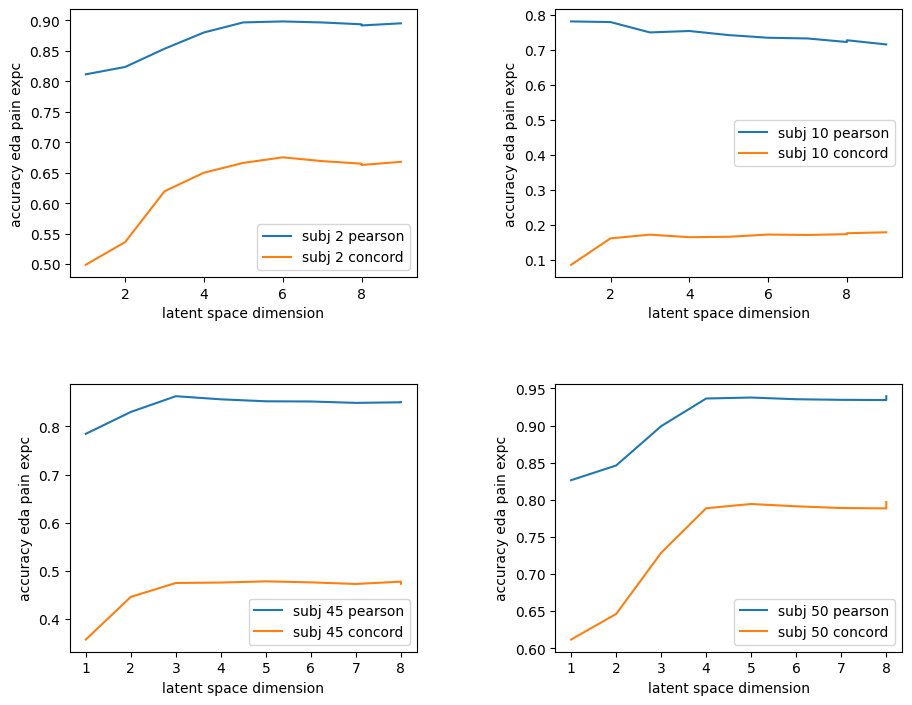

In [344]:
count=0
for i in list(['2','10','45','50']):
    count=count+1
    y_p = df_eda_long[df_eda_long['subj']==i]['pear']
    y_c = df_eda_long[df_eda_long['subj']==i]['conc']

    x = df_eda_long[df_eda_long['subj']==i]['k']
    assert len(x)==len(y_p)

    plt.subplot(4, 2, count)
    plt.plot(x,y_p)
    plt.plot(x,y_c)
    plt.legend(['subj '+i+' pearson','subj '+i+' concord'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

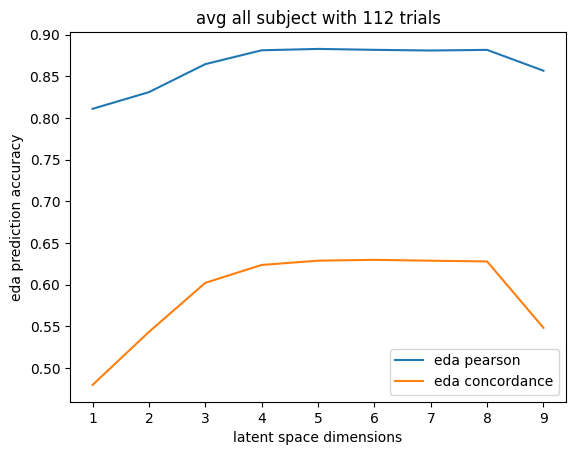

In [345]:
#plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['eda pearson','eda concordance'])
plt.show

# confronto eda 160 eda 112

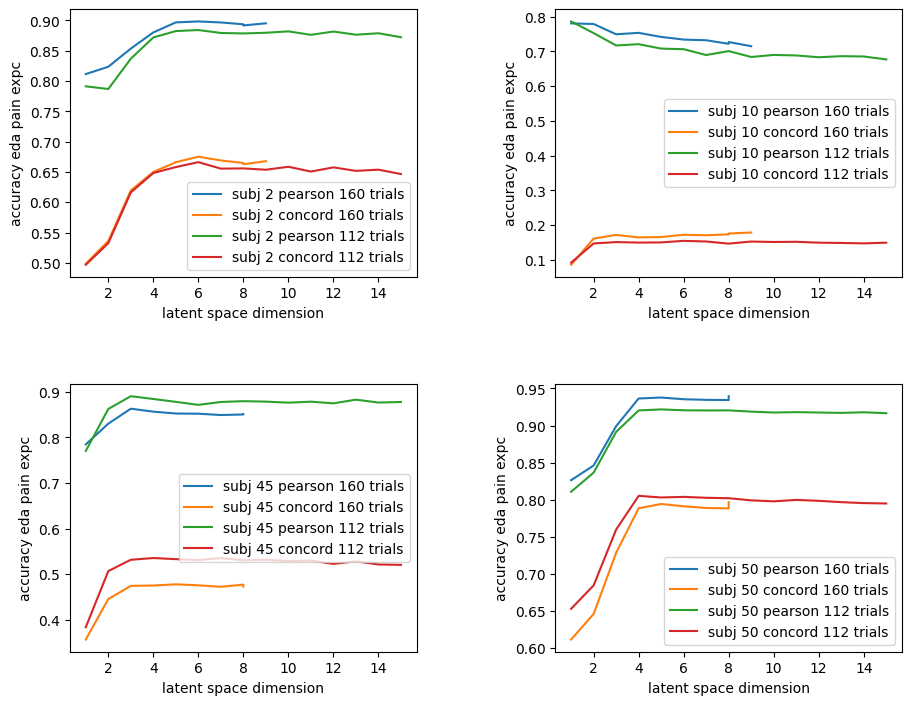

In [351]:
count=0
for i in list(['2','10','45','50']):
    count=count+1

    y_p_l = df_eda_long[df_eda_long['subj']==i]['pear']
    y_c_l = df_eda_long[df_eda_long['subj']==i]['conc']
    x_l = df_eda_long[df_eda_long['subj']==i]['k']

    assert len(x_l)==len(y_p_l)
    assert len(x_l)==len(y_c_l)

    y_p = df_eda[df_eda['subj']==i]['pear']
    y_c = df_eda[df_eda['subj']==i]['conc']
    x = df_eda[df_eda['subj']==i]['k']

    assert len(x)==len(y)

    plt.subplot(4, 2, count)

    plt.plot(x_l,y_p_l)
    plt.plot(x_l,y_c_l)

    plt.plot(x,y_p)
    plt.plot(x,y_c)

    plt.legend(['subj '+i+' pearson 160 trials','subj '+i+' concord 160 trials','subj '+i+' pearson 112 trials','subj '+i+' concord 112 trials'])
    plt.xlabel('latent space dimension')
    plt.ylabel('accuracy eda pain expc')

plt.subplots_adjust(left=0.1,bottom=0.1,right=1.4,top=3,wspace=0.4,hspace=0.4)
#plt.subplot_tool()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

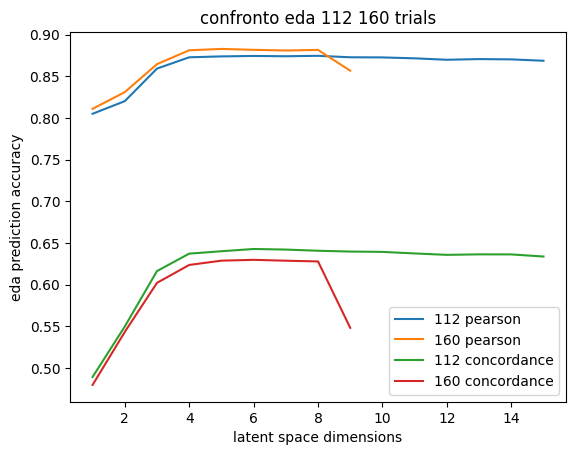

In [357]:
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda,list_y_conc_eda)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('confronto eda 112 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('eda prediction accuracy')
plt.legend(['112 pearson','160 pearson','112 concordance','160 concordance'])
plt.show

# confronto eda pain expectation

## confronto su 160 trials

<function matplotlib.pyplot.show(close=None, block=None)>

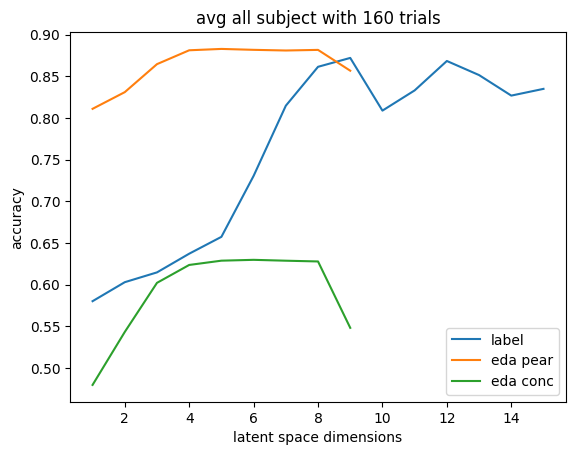

In [356]:
plt.plot(list_x,list_y)
plt.plot(list_x_eda_l,list_y_pear_eda_l)
plt.plot(list_x_eda_l,list_y_conc_eda_l)
plt.title('avg all subject with 160 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy')
plt.legend(['label','eda pear','eda conc'])
plt.show

## confronto su 112 trials

<function matplotlib.pyplot.show(close=None, block=None)>

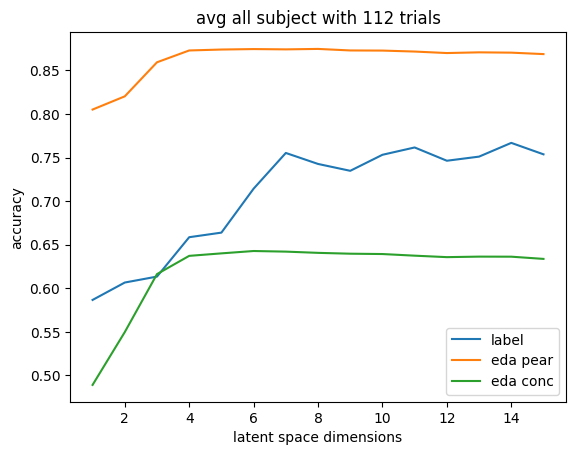

In [355]:
plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy')
plt.legend(['label','eda pear','eda conc'])
plt.show